# ACP AVEC PYTHON 


Ce projet consiste en une implémentation de l'Analyse en Composantes Principales (ACP) en Python. L'ACP est une technique de réduction de dimensionnalité qui permet de transformer un ensemble de variables corrélées en un ensemble de variables non corrélées appelées composantes principales. Cette implémentation fournit une interface simple et efficace pour effectuer une ACP sur des ensembles de données, ce qui permet d'analyser et de visualiser les relations entre les variables et de réduire la dimensionnalité des données tout en préservant au maximum l'information importante

# Les etapes :
1 Chargement des données : Chargez vos données dans un DataFrame pandas si elles sont stockées dans un fichier CSV, Excel ou une autre source de données.

2 Standardisation des données : Il est généralement recommandé de standardiser vos données avant d'appliquer l'ACP pour que chaque variable ait une variance comparable. Vous pouvez utiliser StandardScaler de scikit-learn pour cela.

3 Instanciation de l'objet PCA : Créez un objet PCA en utilisant la classe PCA de scikit-learn. Spécifiez le nombre de composantes principales que vous souhaitez conserver.

4Ajustement du modèle : Ajustez l'objet PCA à vos données standardisées en utilisant la méthode fit().
Transformation des données : Transformez vos données en utilisant la méthode transform() pour obtenir les composantes principales.

5 Analyse des résultats : Analysez les composantes principales pour comprendre la variance expliquée par chaque composante, visualisez les données dans un espace de dimension réduite et identifiez les structures ou les tendances sous-jacentes.

In [ ]:
# comme premier etape est de telecharger data

In [4]:
#importe
import pandas as pd

import sklearn

In [17]:


# Chemin vers le fichier CSV
chemin_fichier_csv = 'autos-acp-diapos.csv'

# Lire le fichier CSV dans un DataFrame
df = pd.read_csv(chemin_fichier_csv)

# Afficher les premières lignes du DataFrame il donne les sinque premier lignes 
print(df.head())


            Modele   CYL  PUISS  LONG  LARG  POIDS  V.MAX
0       Alfasud TI  1350     79   393   161    870    165
1         Audi 100  1588     85   468   177   1110    160
2       Simca 1300  1294     68   424   168   1050    152
3  Citroen GS Club  1222     59   412   161    930    151
4         Fiat 132  1585     98   439   164   1105    165


In [6]:
print(df.shape)


(18, 7)


In [7]:
print(df)

             Modele   CYL  PUISS  LONG  LARG  POIDS  V.MAX
0        Alfasud TI  1350     79   393   161    870    165
1          Audi 100  1588     85   468   177   1110    160
2        Simca 1300  1294     68   424   168   1050    152
3   Citroen GS Club  1222     59   412   161    930    151
4          Fiat 132  1585     98   439   164   1105    165
5       Lancia Beta  1297     82   429   169   1080    160
6       Peugeot 504  1796     79   449   169   1160    154
7     Renault 16 TL  1565     55   424   163   1010    140
8        Renault 30  2664    128   452   173   1320    180
9    Toyota Corolla  1166     55   399   157    815    140
10     Alfetta 1.66  1570    109   428   162   1060    175
11    Princess 1800  1798     82   445   172   1160    158
12      Datsun 200L  1998    115   469   169   1370    160
13      Taunus 2000  1993     98   438   170   1080    167
14           Rancho  1442     80   431   166   1129    144
15       Mazda 9295  1769     83   440   165   1095    1

LES STATISTIQUE DESCRIPTIVE POUR MIEUX COMPENDRE  LA RELATION ENTRE LES COMMPODENTES 

In [8]:
# Exclure la colonne "Modele" du calcul de la moyenne
moyennes_colonnes = df.drop(columns=['Modele']).mean()

# Afficher les moyennes
print("Moyenne de chaque colonne (hors colonne 'Modele') :")
print(moyennes_colonnes)

Moyenne de chaque colonne (hors colonne 'Modele') :
CYL      1631.666667
PUISS      84.611111
LONG      433.500000
LARG      166.666667
POIDS    1078.833333
V.MAX     158.277778
dtype: float64


In [9]:


# Exclure la colonne 'Modele' (car elle contient des chaînes de caractères)
matrice = df.drop(columns=['Modele']).values

# Afficher la matrice
print("Matrice des valeurs numériques :")
print(matrice)


Matrice des valeurs numériques :
[[1350   79  393  161  870  165]
 [1588   85  468  177 1110  160]
 [1294   68  424  168 1050  152]
 [1222   59  412  161  930  151]
 [1585   98  439  164 1105  165]
 [1297   82  429  169 1080  160]
 [1796   79  449  169 1160  154]
 [1565   55  424  163 1010  140]
 [2664  128  452  173 1320  180]
 [1166   55  399  157  815  140]
 [1570  109  428  162 1060  175]
 [1798   82  445  172 1160  158]
 [1998  115  469  169 1370  160]
 [1993   98  438  170 1080  167]
 [1442   80  431  166 1129  144]
 [1769   83  440  165 1095  165]
 [1979  100  459  173 1120  173]
 [1294   68  404  161  955  140]]


Nous instancions l’objet et nous l’appliquons sur la matrice X. Nous obtenons une matrice Z
𝑧𝑖𝑗 =la somme (𝑥𝑖𝑗 − 𝑥𝑗)/𝜎

# matrice z
Ce code utilise la classe StandardScaler de la bibliothèque sklearn.preprocessing pour effectuer la standardisation des données. Voici ce que chaque ligne fait :

Importation de la classe StandardScaler depuis le module sklearn.preprocessing.
Instanciation d'un objet sc de la classe StandardScaler().
Transformation des données X en effectuant le centrage et la réduction grâce à la méthode fit_transform() de l'objet sc. Les données standardisées sont stockées dans la variable Z.
Affichage des données standardisées Z.

In [10]:
x=matrice
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(x)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

# concepte_de_standardisation.

La standardisation des données, également connue sous le nom de centrage-réduction, est un processus utilisé en statistiques et en apprentissage automatique pour mettre à l'échelle les données. L'objectif est de rendre les variables indépendantes de leur échelle d'origine, ce qui peut être nécessaire pour certains algorithmes d'apprentissage automatique ou pour faciliter l'interprétation des données.

Voici comment la standardisation des données fonctionne généralement :

Centrage : Pour chaque variable, la moyenne de toutes les observations est soustraite à chaque observation. Cela signifie que la nouvelle moyenne de la variable sera égale à zéro.
Réduction : Ensuite, chaque valeur est divisée par l'écart type de la variable. Cela permet d'obtenir une variance de 1 pour chaque variable.
En conséquence, après la standardisation, chaque variable a une moyenne de zéro et un écart type de un. Cela garantit que chaque variable contribue de manière égale à l'analyse ou à l'apprentissage automatique, indépendamment de ses unités d'origine.

La standardisation est souvent utilisée avant l'application d'algorithmes d'apprentissage automatique qui supposent que les données sont centrées et ont une variance homogène, tels que les méthodes basées sur les distances (par exemple, k-moyennes, k plus proches voisins) ou les méthodes basées sur les gradients (par exemple, régression linéaire, régression logistique). Cela peut également aider à accélérer la convergence des algorithmes d'optimisation.

# calcul de la moiyen de z et ecartype  

In [15]:
import numpy as np

# Calculer la moyenne de chaque colonne de la matrice Z
moyenne_colonnes = np.mean(Z, axis=0)

# Afficher la moyenne de chaque colonne
print("Moyenne de chaque colonne :")
print(moyenne_colonnes)


Moyenne de chaque colonne :
[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]


# interpretation du resultats

Il semble que les moyennes de chaque colonne de la matrice Z sont très proches de zéro, mais elles ne sont pas exactement zéro en raison de la précision des calculs informatiques. En effet, les valeurs affichées sont de l'ordre de \(10^{-15}\) ou \(10^{-16}\), ce qui est extrêmement proche de zéro.

Dans ce cas, vous pouvez considérer que la standardisation a été effectuée avec succès. Les valeurs très proches de zéro indiquent que les données ont été centrées correctement autour de zéro, ce qui est l'objectif de la standardisation. La précision de \(10^{-15}\) ou \(10^{-16}\) est généralement bien en deçà de ce qui est nécessaire pour la plupart des applications, donc ces petites différences ne devraient pas poser de problème dans la plupart des cas.


In [18]:
#écart-type
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


L'Analyse en Composantes Principales (PCA) est une technique couramment utilisée en apprentissage automatique et en statistiques pour la réduction de dimensionnalité et la visualisation des données. La bibliothèque scikit-learn offre une implémentation efficace de l'ACP via le module sklearn.decomposition.

Voici quelques raisons pour lesquelles vous pourriez choisir d'utiliser PCA de scikit-learn :

#Réduction de dimensionnalité : PCA vous permet de réduire le nombre de variables dans vos données en projetant celles-ci sur un espace de dimension inférieure, tout en conservant autant d'informations que possible. Cela peut être utile pour simplifier la modélisation tout en maintenant la plupart des informations importantes contenues dans les données originales.
#Détection de structure : PCA identifie les structures et les tendances sous-jacentes dans vos données en extrayant les composantes principales qui capturent la variance maximale. Cela peut vous aider à mieux comprendre les relations entre les variables et les schémas cachés dans vos données.
#Visualisation des données : En réduisant la dimensionnalité de vos données à deux ou trois dimensions, PCA permet une visualisation efficace des données dans un espace de plus basse dimension. Cela peut vous aider à identifier les clusters, les schémas et les anomalies dans vos données d'une manière plus intuitive.
#Prétraitement des données : PCA peut également être utilisé comme une étape de prétraitement pour améliorer les performances des modèles d'apprentissage automatique. En réduisant la dimensionnalité et en éliminant la corrélation entre les variables, PCA peut souvent améliorer la convergence des algorithmes d'apprentissage et réduire les problèmes de surajustement.
Compression de données : En comprimant vos données tout en conservant la plupart des informations importantes, PCA peut être utilisé pour économiser de l'espace de stockage et accélérer le temps de calcul dans le cas de grandes bases de données ou de données à haute dimensionnalité.

In [20]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [21]:
# calcul
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) 
print(acp.explained_variance_)

6
[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [25]:
# Calcul du nombre d'observations
n = Z.shape[0]  # Nombre de lignes dans la matrice Z

# Calcul des valeurs propres corrigées
eigval = (n-1)/n * acp.explained_variance_
print(eigval)


[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [26]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


La ligne de code print(acp.explained_variance_ratio_) vous permet d'imprimer les proportions de variance expliquée par chaque composante principale. Ces proportions sont calculées en divisant chaque valeur propre par la somme totale des valeurs propres.

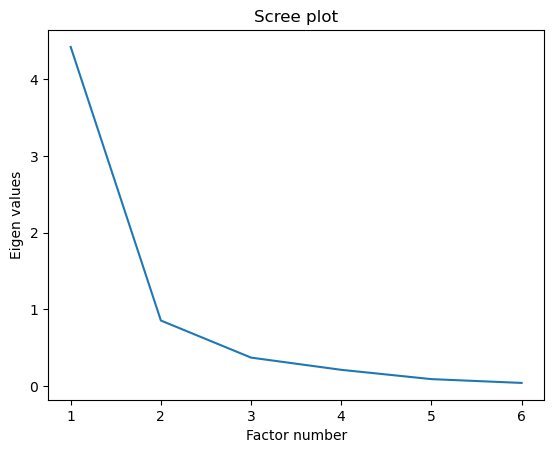

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Définition du nombre de composantes principales
p = len(eigval)

# Tracer le scree plot
plt.plot(np.arange(1, p+1), eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


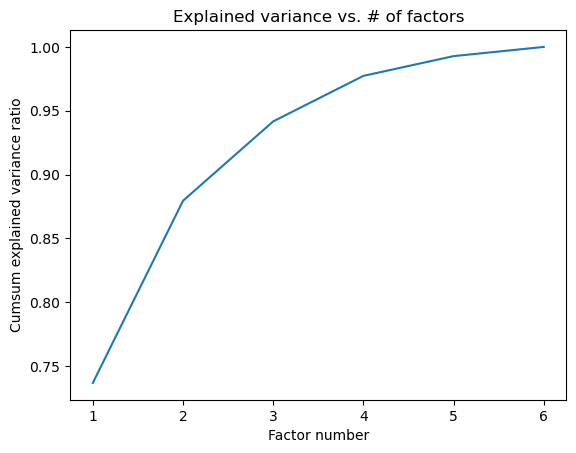

In [37]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [ ]:
n